In [1]:
import numpy as np
import matplotlib.pyplot as plt

# How wide should our fairways be?

Imagine that we are running a golf tournament, and we pride ourselves in placing a premium on accuracy. That is, we want to give the biggest advantage in some sense to those who drive the ball the straightest.

Conventional wisdom employed by the USGA in setting up many US Opens has been that we should make the fairways very narrow. The average fairway width for the 2020 US Open at Winged Foot, for instance, was 22 yards. The chatter before the event seemed to be that the golf course setup would require precision over brute strength to be successful. But then, much to the dismay of old-fashioned golf thinkers everywhere, Bryson DeChambeau won the event by a whopping 6 shots after embarking on a very public journey to hit the golf ball as hard as humanly possible.

What gives? Let's investigate!

First, I will point out that the limiting cases are informative. That is, if we were to make the fairways infinitely wide, then nobody would care about accuracy because everyone would hit every fairway. On the other hand, if we were to make the fairways infinitely narrow, it would also be the case that nobody would care about accuracy because everyone would miss every fairway.

We obviously don't want either of these to be the case, so what do we do? Under some mild assumptions about what our objective is (we will come back to this), there are a couple of very informative mathematical theorems that will come to save the day and inform us that indeed, an OPTIMAL fairway width does exists, not too wide and not too narrow, that will maximize the advantage the advantage that straight hitters will have over crooked ones.

-
(Disclaimer: there are many different ways that you can choose fairway width. I am going with variance in fairway percentage with a driver as the main target to optimize, but we could do this over with any objective you like. I chose this one for simplicity of calculation/understanding plus ability to be mathematically specific about what we want. However, every hole is different and may want to emphasize a slightly different thing each time, hence why fairways are not all the same width in practice.)
-

### You can't just keep making fairways narrower: The Proof
#### (feel free to skip if you don't like seeing too much math)

The first theorem we will need is Rolle's theorem, which states that if $f(a) = f(b)$ for $a \neq b$ and $f$ is continuous on $[a, b]$, there exists a point $x \in (a, b)$ such that $f'(x) = 0$.

The next is the simple fact that variance $\text{E}[(X - \text{E}[X])^2]$ is always nonnegative. Square numbers are always nonnegative, and nonegativity implies that the integral (expectation) is also nonnegative.

The Intermediate Value theorem states that if $f$ is continuous on $[a, b]$ then for all $y \in [f(a), f(b)]$ there exists an $x \in [a, b]$ with $f(x) = y$.

Finally, we know that over any interval $[a, b]$ there exists a global maximum of $f$, and furthermore, if $f$ is differentiable, that maximum will either be at $a, b$ or some $x$ with $f'(x) = 0$.

Putting all of these together, we will denote the variance in fairway percentage as a function of fairway width by $f(x)$. Note that we observed nonzero variance in fairway percentage at the 2020 US Open, so there is some width $W$ that creates nonzero variance. We will call that number $y_0$.

Now observe that there exists a number $y_1$ between $y_0$ and 0. The variance must attain this value at some number $a$ between W and 0 due to the intermediate value theorem, and it also must attain this value at some number $b$ between W and infinity due to the limit being zero, continuity, and the intermediate value theorem. Thus, by Rolle's theorem, there exists an $x$ between $a$ and $b$ with $f'(x) = 0$. Note that there could be multiple such $x$, but that does not matter, since we can pick the one that creates the biggest value of $f$.

Now, we recognize that there is a maximum variance, and the only candidates for maximizing the variance are $a$, $b$, and $x$. But we know that $a$ and $b$ do not maximize the variance, since $f(a) = f(b) = y_1 < y_0 = f(W)$. 

So there is some width $x$, not too wide and not too narrow, which maximizes the variance. Therefore, it would be reasonable to choose $x$ as a good fairway width for our tournament!

### What does this mean for us?

We've mathematically proven that there is a "goldilocks" zone of fairway width (not too wide but also not too narrow) that will maximize the advantage of accurate players. Now how will we find this optimal width?

On my twitter a couple years ago, I did a simple illustrative example using two hypothetical players, trying to maximize the difference in fairway percentage between those two fairway percentages, and came up with a number much bigger than 22 yards (32.5 yards if I remember correctly). It is a good way to see the point; however, this is not taking into account the whole field. Is it possible that after accounting for the whole field, the USGA had it right after all? 

Working out the math by hand gets a bit ugly, so let's use some simulation!

### First, we sample some players to be in the field of our tournament.

We will assume that a player's shot patterns are normally distributed with some side to side standard deviation $\sigma$. Further, we will assume that players' standard deviations are normally distributed across the tour with mean $\mu$ and standard deviation $\tau$. We will use $\mu = 16.5$ and $\tau = 1.5$.

These are reasonable assumptions to make, but they can be easily adjusted later if we get better information on shot patterns!

In [63]:
def sample_players(mu, tau, n_players):
    #########################################
    # this is where the most guessing occurs!
    # assume stdev is normal across the tour
    # guess at average stdev
    # guess at stdev spread
    #
    # if anyone has better info on this,
    # please share!
    #########################################
    players = np.random.normal(loc=mu, scale=tau, size=n_players)
    return players

# Example printout:

players = sample_players(16.5, 1.5, 5)
print(players)

[16.39381491 17.18157379 17.74650799 16.44713687 16.14148296]


### Now, let's simulate some drives by each player

In [68]:
def sample_drives(players, n_drives):
    ###############################
    # simulates tee shots for
    # a list of players
    #
    # normal shot pattern is used,
    # but this can also be adjusted
    ###############################
    n_players = np.size(players)
    x = np.random.normal(loc=np.zeros(n_players), scale=players, size=(n_drives, n_players))
    return x

# Example printout:

drives = sample_drives(players, 10)
print(drives)

[[ 30.48138271  28.9797021   -2.57550022   9.88816659  13.3779771 ]
 [ 10.80777217   2.65174408  -1.09957493   6.82040925 -12.35942715]
 [  0.62975467  -1.50005154 -25.67413061  -5.96754879 -16.49314724]
 [  8.78584009  -1.29231265 -17.07934394 -25.65008612  16.77681347]
 [-11.3018785  -26.49797833  -3.01922347   7.01257162  -4.55398601]
 [  9.4211286    0.57800291   3.04054414 -18.01274178 -13.41685672]
 [ 18.83666523   9.12500526  -4.28224016  13.2335299   -7.46817329]
 [  8.18357535   8.98029147  35.02111651  16.85955085 -31.12891104]
 [  0.58410952  -1.65871299 -24.29973513 -18.69759412  -5.69548397]
 [  5.51213806  34.46927587  44.01039643  22.75774255  -2.71740683]]


### Next, let's count up the fairway percentage for each player for a given width

In [83]:
def fwy_pcts(width, drives):
    #####################################
    # calculates fairway percetage
    # down columns at a given width
    #####################################
    n, m = np.shape(drives)
    x = np.abs(drives)
    hit = x < width/2
    return 100 * np.sum(hit, axis=0)/n

# Example printout:

fwys = fwy_pcts(25, drives)
print(fwys)

[80. 70. 50. 40. 50.]


## Finally, let's see how these fairway percentages act at different fairway widths

Below, I will simulate a huge tournament with uniform fairway width to reduce estimator variance and get smoother curves out of the simulation. Uniform fairway width may add a small bias to the estimates, but I believe that this bias will be relatively negligible. For large sample size, I will simulate a 10x full-field event, where there is no cut and they each play 10x as many (40) rounds.

### As you would expect, fairway percentage goes up when fairways get wider. No surprise!

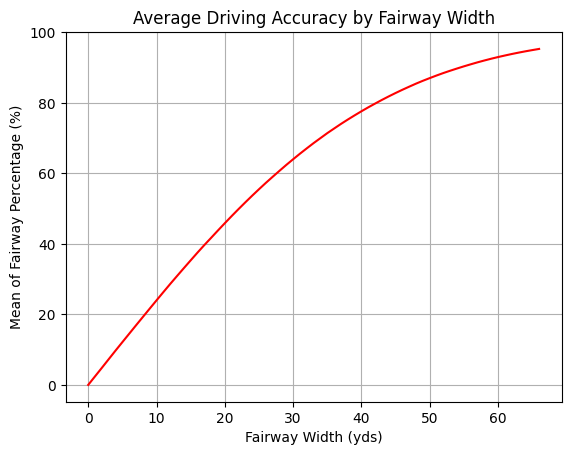

In [73]:
def plot_fwy_mean(mu, tau, n_players, n_drives):
    players = sample_players(mu, tau, n_players)
    drives = sample_drives(players, n_drives)
    widths = np.linspace(0, 66, num=67)
    means = []
    for width in widths:
        fwys = fwy_pcts(width, drives)
        s = np.mean(fwys)
        means.append(s)
    stdevs = np.array(means)
    plt.plot(widths, means, color='red')
    plt.title('Average Driving Accuracy by Fairway Width')
    plt.xlabel('Fairway Width (yds)')
    plt.ylabel('Mean of Fairway Percentage (%)')
    plt.grid()
    plt.show()
    
plot_fwy_mean(16.5, 1.5, 1560, 560)

### What about the spread across the field though?

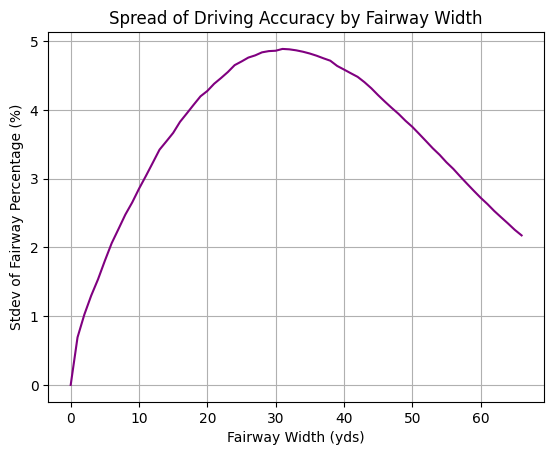

In [72]:
def plot_fwy_stdev(mu, tau, n_players, n_drives):
    players = sample_players(mu, tau, n_players)
    drives = sample_drives(players, n_drives)
    widths = np.linspace(0, 66, num=67)
    stdevs = []
    for width in widths:
        fwys = fwy_pcts(width, drives)
        s = np.sqrt(np.var(fwys))
        stdevs.append(s)
    stdevs = np.array(stdevs)
    plt.plot(widths, stdevs, color='purple')
    plt.title('Spread of Driving Accuracy by Fairway Width')
    plt.xlabel('Fairway Width (yds)')
    plt.ylabel('Stdev of Fairway Percentage (%)')
    plt.grid()
    plt.show()
    
plot_fwy_stdev(16.5, 1.5, 1560, 560)

### Whoa! There is very clearly a peak, just as we mathematically proved, and it is indeed much wider than the fairways were at Winged Foot!

What would need to change to make Winged Foot optimal? There are two options: one would be to have players whose dispersions are only about 12 yds wide, which is just NOT TRUE EVER, and the other would be that the variance of shot pattern spreads is MUCH smaller, which is also not reasonable. 

The following two runs are the situations I am talking about:

### Unreasonably small $\tau$

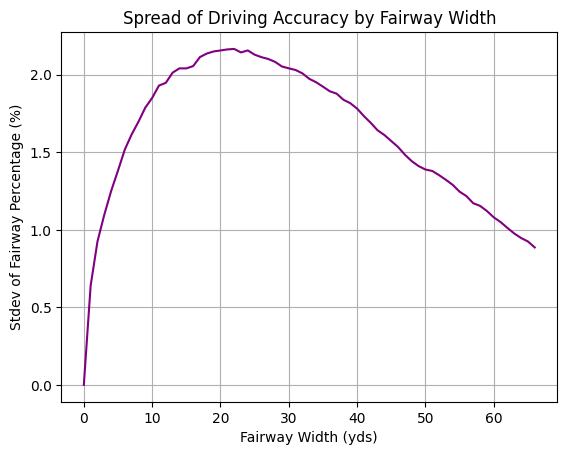

In [85]:
plot_fwy_stdev(16.5, 0.1, 1560, 560)

### Unreasonably small $\mu$

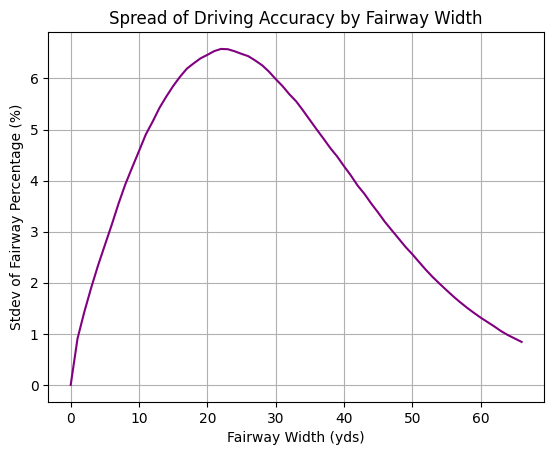

In [82]:
plot_fwy_stdev(12, 1.5, 1560, 560)

## Takeaways

We cannot simply make fairways narrower and narrower to put more and more emphasis on accuracy. That is just plainly not how it works. We can analayze the "premium on accuracy" due to fairway width from a few different angles. Here we used driving accuracy variance across the field, but some other ideas could be expected scoring variance across a the field while holding distance constant, expected scoring variance across the field while accounting for correlation between distance and accuracy, win probability of the most accurate players, win probability of the most accurate players relative to distance, or any other number of objectives, but I believe that the results would all be -relatively similar- to each other.

The analysis here estimates that contrary to popular belief, the fairways need to be significantly wider than many US Opens traditionally have been to put the biggest premium on accuracy. A reasonable estimate is just a bit wider than 30 yds.

#### But then how do we control scoring?

Short answer: there are ways to make golf courses hard that don't consist of just making the entire golf course rough or placing excessive penalties on slightly offline tee shots.

Long answer: let's discuss!